In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("SongDetails.csv")
df

,Unnamed: 0,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,...,World/Traditional,classical,country,R&B,blues,pop,jazz,hip hop,set(),easy listening
0,0,211160,False,2000,77,0.751,0.834,1,-5.444,0,...,0,0,0,0,0,1,0,0,0,0
1,1,167066,False,1999,79,0.434,0.897,0,-4.918,1,...,0,0,0,0,0,1,0,0,0,0
2,2,250546,False,1999,66,0.529,0.496,7,-9.007,1,...,0,0,1,0,0,1,0,0,0,0
3,3,224493,False,2000,78,0.551,0.913,0,-4.063,0,...,0,0,0,0,0,0,0,0,0,0
4,4,200560,False,2000,65,0.614,0.928,8,-4.806,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,181026,False,2019,79,0.842,0.734,1,-5.065,0,...,0,0,0,0,0,1,0,0,0,0
1996,1996,178426,False,2019,78,0.552,0.702,9,-5.707,1,...,0,0,0,0,0,1,0,0,0,0
1997,1997,200593,False,2019,69,0.847,0.678,9,-8.635,1,...,0,0,1,0,0,0,0,1,0,0
1998,1998,171029,False,2019,75,0.741,0.520,8,-7.513,1,...,0,0,0,0,0,1,0,0,0,0


In [3]:
columns_to_keep = df.columns[:10]
df = df[columns_to_keep]
print("Dataset after reducing to 10 columns:")
print(df.head())

Dataset after reducing to 10 columns:
   Unnamed: 0  duration_ms  explicit  year  popularity  danceability  energy  \
0           0       211160     False  2000          77         0.751   0.834   
1           1       167066     False  1999          79         0.434   0.897   
2           2       250546     False  1999          66         0.529   0.496   
3           3       224493     False  2000          78         0.551   0.913   
4           4       200560     False  2000          65         0.614   0.928   

   key  loudness  mode  
0    1    -5.444     0  
1    0    -4.918     1  
2    7    -9.007     1  
3    0    -4.063     0  
4    8    -4.806     0  


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])
print("Missing values handled successfully!")

C:\Users\Neelanshu M\AppData\Local\Temp\ipykernel_21832\2587893470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
principal_components = pca.fit_transform(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

Missing values handled successfully!


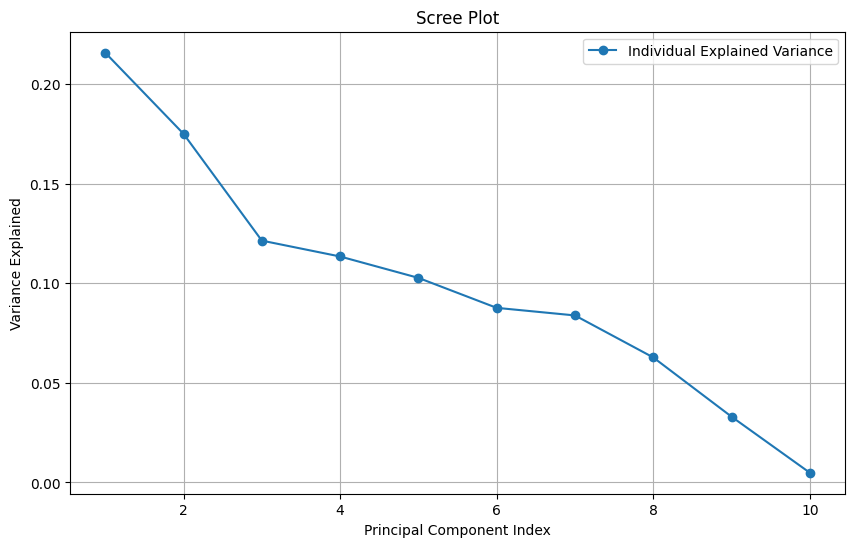

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

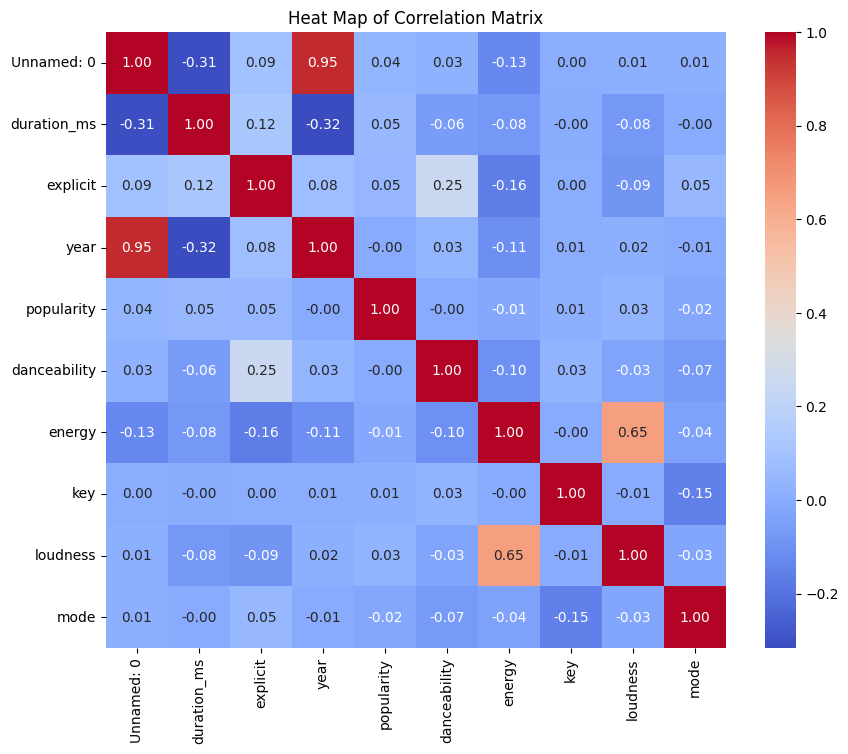

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(df_scaled, columns=columns_to_keep).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heat Map of Correlation Matrix')
plt.show()

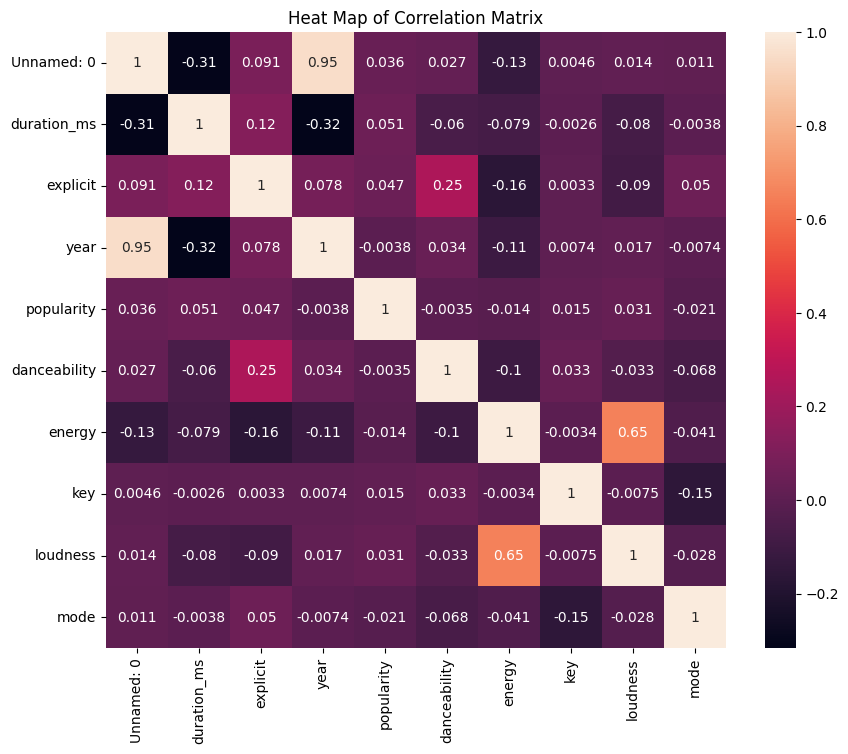

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(df_scaled, columns=columns_to_keep).corr(), annot=True)
plt.title('Heat Map of Correlation Matrix')
plt.show()

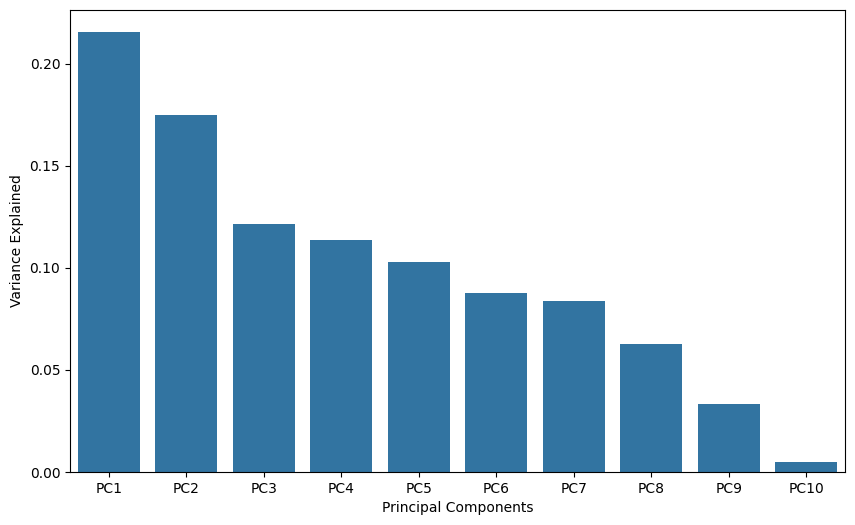


PC1 and PC2:
        PC1       PC2
0 -2.182527  0.426337
1 -2.203454  1.414705
2 -2.228736 -2.227592
3 -2.560454  1.379404
4 -2.291776  1.269326


In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance_ratio))], y=explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

reduced_df = pd.DataFrame(principal_components[:, :2], columns=['PC1', 'PC2'])
print("\nPC1 and PC2:")
print(reduced_df.head())